To use a binary classifier with the MNIST dataset, you need to adapt the dataset and build a model to distinguish between two classes (e.g., digit 0 vs. digit 1). Here's a brief guide:

Load and Preprocess MNIST: Use a library like TensorFlow/Keras or PyTorch to load the MNIST dataset. Filter the dataset to include only two classes (e.g., digits 0 and 1). Normalize pixel values (0-255) to [0,1] by dividing by 255. Flatten or reshape images (28x28) for input to the model.
Prepare Data: Split the filtered dataset into training and testing sets (e.g., 80% train, 20% test). Create labels (0 for one class, 1 for the other).
Build Binary Classifier: Use a simple neural network (e.g., in Keras):

Input layer: 784 units (28x28 flattened).
Hidden layer(s): Dense layers with ReLU activation (e.g., 128 units).
Output layer: 1 unit with sigmoid activation (for binary classification).
Loss: Binary cross-entropy; Optimizer: Adam; Metric: Accuracy.


Train Model: Fit the model on the training data (e.g., 10 epochs, batch size 32).
Evaluate: Test the model on the test set to check accuracy and loss.
Predict: Use the trained model to classify new MNIST images (0 or 1).

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')) > 0)
print(tf.config.list_physical_devices('GPU'))

False
[]


In [3]:
%pip install scikit-learn-intelex numpy pandas matplotlib seaborn scikit-learn

     ---------------------------------------- 3.0/3.0 MB 5.1 MB/s eta 0:00:00
     --------------------------------------- 11.3/11.3 MB 18.7 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 14.8 MB/s eta 0:00:00
     ------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 19.6 MB/s eta 0:00:00
     --------------------------------------- 82.3/82.3 MB 11.3 MB/s eta 0:00:00
     ------------------------------------- 420.6/420.6 kB 25.6 MB/s eta 0:00:00
     ------------------------------------- 370.3/370.3 kB 24.0 MB/s eta 0:00:00
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
     -------------------------------------- 111.1/111.1 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 26.3 MB/s eta 0:00:00
     ------------------------------------- 221.2/221.2 kB 13.2 MB/s eta 0:00:00
     ----

In [4]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [6]:
# Load and filter MNIST for digits 0 and 1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_mask = (y_train == 0) | (y_train == 1)
test_mask = (y_test == 0) | (y_test == 1)
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

In [7]:
# Preprocess
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

In [8]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(1, activation='sigmoid')
])

e:\AI\ai-ml-course\.venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9947 - loss: 0.0187 - val_accuracy: 0.9992 - val_loss: 0.0023
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0035 - val_accuracy: 0.9996 - val_loss: 6.4843e-04
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 9.4833e-04 - val_accuracy: 0.9996 - val_loss: 5.2301e-04
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.3594e-04 - val_accuracy: 0.9996 - val_loss: 7.4627e-04
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.0856e-04 - val_accuracy: 0.9996 - val_loss: 7.2435e-04
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.5889e-04 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 -

In [11]:
# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9995 - loss: 0.0022    
Test accuracy: 0.9995272159576416


**Sequential in Keras**: A class for building neural networks by stacking layers linearly, where output of one layer is input to the next. Simplifies model creation without complex graphs.

Example:  
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])
```
This creates a model with input of 10 features, a hidden layer, and binary output.

**ReLU (Rectified Linear Unit)**: Activation function introducing non-linearity: \( f(x) = \max(0, x) \). Outputs x if positive, 0 otherwise. Prevents vanishing gradients, efficient for deep networks.

Example:  
- Input: 5 → Output: 5  
- Input: -3 → Output: 0  
In a neuron: If weighted sum is 2, ReLU outputs 2; if -1, outputs 0.

**Sigmoid**: Activation function: \( f(x) = \frac{1}{1 + e^{-x}} \). Squashes inputs to [0,1], ideal for binary classification probabilities.

Example:  
- Input: ∞ → Output: ~1  
- Input: 0 → Output: 0.5  
- Input: -∞ → Output: ~0  
In binary classifier: Output 0.8 means 80% probability of class 1.

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32").flatten()
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)   

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
Confusion Matrix:
[[ 979    1]
 [   0 1135]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



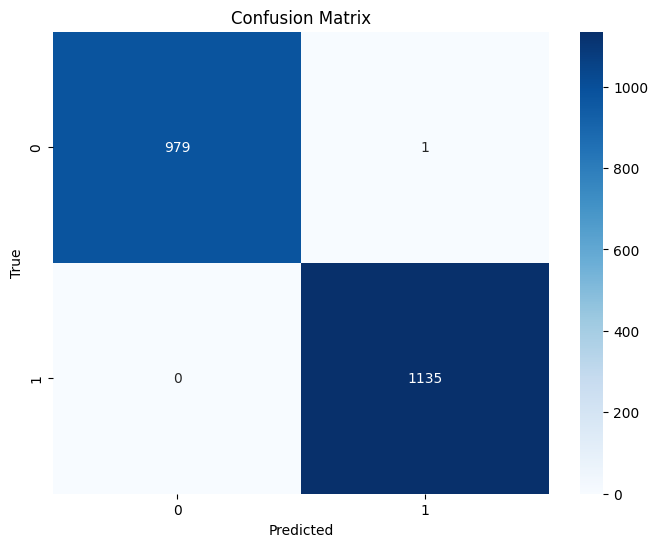

In [13]:
# precision, recall, f1_score, support = classification_report(y_test, y_pred, output_dict=True)['1'].values()
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.svm import SVC

# Reshape data for SVM
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0



# Train SVM on the same data    
svm_model = SVC()
svm_model.fit(x_train, y_train)
# Evaluate SVM
svm_accuracy = svm_model.score(x_test, y_test)
print(f"SVM Test accuracy: {svm_accuracy}")
# Predictions with SVM
y_pred_svm = svm_model.predict(x_test)
# Confusion matrix and classification report for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Test accuracy: 0.9792
SVM Confusion Matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [15]:
# predict
y_pred_svm = svm_model.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



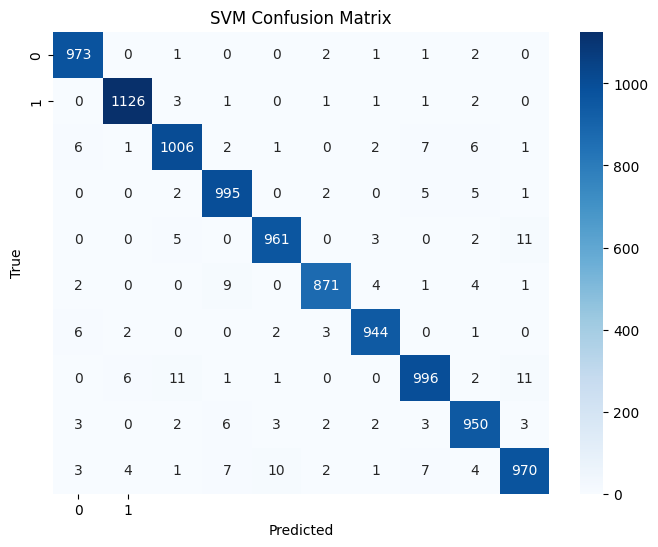

In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))  
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()